<a href="https://colab.research.google.com/github/MarianVelasquez/Sentiment-Analysis-and-Text-Mining/blob/main/Assigment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import libraries for NLP

import nltk.stem
nltk.download('wordnet')
import nltk
nltk.download('punkt_tab')

#Import stopwords to clean data
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
import warnings
import re

warnings.filterwarnings('ignore')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('words')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [3]:
#import text set

with open('article.txt', 'r') as file:
    text = file.read()
df=text

In [71]:
df

'Violence against women\n25 March 2024\nKey facts\nViolence against women – particularly intimate partner violence and sexual violence – is a major public health problem and a violation of women\'s human rights.\nEstimates published by WHO indicate that globally about 1 in 3 (30%) of women worldwide have been subjected to either physical and/or sexual intimate partner violence or non-partner sexual violence in their lifetime.\nMost of this violence is intimate partner violence. Worldwide, almost one third (27%) of women aged 15-49 years who have been in a relationship report that they have been subjected to some form of physical and/or sexual violence by their intimate partner.\nViolence can negatively affect women’s physical, mental, sexual, and reproductive health, and may increase the risk of acquiring HIV in some settings.\nViolence against women is preventable. The health sector has an important role to play to provide comprehensive health care to women subjected to violence, and 

In [4]:
# Part 1 Clean text

cleantext=text.lower() #convert all text to lowercase
cleantext=re.sub(r'[^\w\s]','',cleantext) #Remove punctuation
cleantext=re.sub(r'  ',' ',cleantext) #Remove extra whitespace
cleantext=re.sub(r'\d+','',cleantext) #Remove digits
cleantext=re.sub(r'\@|\#|\_','',cleantext) #Remove special caracters


In [5]:
cleantext

'violence against women\n march \nkey facts\nviolence against women particularly intimate partner violence and sexual violence is a major public health problem and a violation of womens human rights\nestimates published by who indicate that globally about  in   of women worldwide have been subjected to either physical andor sexual intimate partner violence or nonpartner sexual violence in their lifetime\nmost of this violence is intimate partner violence worldwide almost one third  of women aged  years who have been in a relationship report that they have been subjected to some form of physical andor sexual violence by their intimate partner\nviolence can negatively affect womens physical mental sexual and reproductive health and may increase the risk of acquiring hiv in some settings\nviolence against women is preventable the health sector has an important role to play to provide comprehensive health care to women subjected to violence and as an entry point for referring women to othe

In [24]:
# Part 2 Tokenization
text_token=word_tokenize(text) #Split into words

import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize

# Sentence Tokenization
sentences = sent_tokenize(text)

# Word Tokenization
words = word_tokenize(text)

print("Sentences:", sentences)
print("Words:", words)

Sentences: ["Violence against women\n25 March 2024\nKey facts\nViolence against women – particularly intimate partner violence and sexual violence – is a major public health problem and a violation of women's human rights.", 'Estimates published by WHO indicate that globally about 1 in 3 (30%) of women worldwide have been subjected to either physical and/or sexual intimate partner violence or non-partner sexual violence in their lifetime.', 'Most of this violence is intimate partner violence.', 'Worldwide, almost one third (27%) of women aged 15-49 years who have been in a relationship report that they have been subjected to some form of physical and/or sexual violence by their intimate partner.', 'Violence can negatively affect women’s physical, mental, sexual, and reproductive health, and may increase the risk of acquiring HIV in some settings.', 'Violence against women is preventable.', 'The health sector has an important role to play to provide comprehensive health care to women su

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [25]:
# Part 3 Stopword Removal
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Remove stopwords
filtered_words = [word for word in words if word not in stop_words]

print("Words Before:", len(words))
print("Words After:", len(filtered_words))
print("Filtered Words:", filtered_words)


Words Before: 2415
Words After: 1681
Filtered Words: ['Violence', 'women', '25', 'March', '2024', 'Key', 'facts', 'Violence', 'women', '–', 'particularly', 'intimate', 'partner', 'violence', 'sexual', 'violence', '–', 'major', 'public', 'health', 'problem', 'violation', 'women', "'s", 'human', 'rights', '.', 'Estimates', 'published', 'WHO', 'indicate', 'globally', '1', '3', '(', '30', '%', ')', 'women', 'worldwide', 'subjected', 'either', 'physical', 'and/or', 'sexual', 'intimate', 'partner', 'violence', 'non-partner', 'sexual', 'violence', 'lifetime', '.', 'Most', 'violence', 'intimate', 'partner', 'violence', '.', 'Worldwide', ',', 'almost', 'one', 'third', '(', '27', '%', ')', 'women', 'aged', '15-49', 'years', 'relationship', 'report', 'subjected', 'form', 'physical', 'and/or', 'sexual', 'violence', 'intimate', 'partner', '.', 'Violence', 'negatively', 'affect', 'women', '’', 'physical', ',', 'mental', ',', 'sexual', ',', 'reproductive', 'health', ',', 'may', 'increase', 'risk', 'a

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
 # Part 4: Stemming and Lemmatization
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Example words
sample_words = ["Violence", "women", "partner", "sexual", "intimate", "health", "rights", "physical", "intimate", "relationship"]

print("Word | Stem | Lemma")
for word in sample_words:
    print(f"{word} | {stemmer.stem(word)} | {lemmatizer.lemmatize(word)}")

Word | Stem | Lemma
Violence | violenc | Violence
women | women | woman
partner | partner | partner
sexual | sexual | sexual
intimate | intim | intimate
health | health | health
rights | right | right
physical | physic | physical
intimate | intim | intimate
relationship | relationship | relationship


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


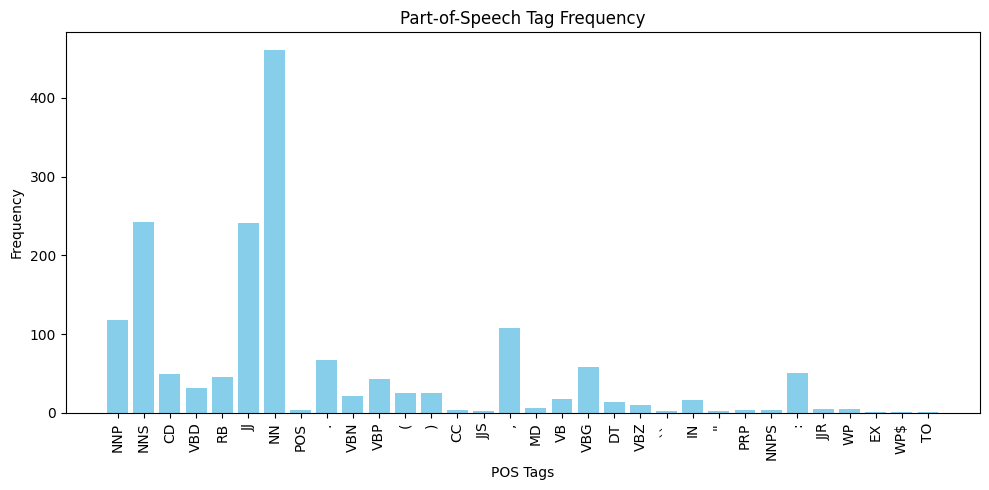

In [32]:
# PArt 5 POS Tagging
import nltk
nltk.download('averaged_perceptron_tagger_eng')
import matplotlib.pyplot as plt
from collections import Counter

# POS Tagging
pos_tags = nltk.pos_tag(filtered_words)

# Count POS frequencies
pos_counts = Counter(tag for word, tag in pos_tags)

# Visualization
plt.figure(figsize=(10,5))
plt.bar(pos_counts.keys(), pos_counts.values(), color='skyblue')
plt.title("Part-of-Speech Tag Frequency")
plt.xlabel("POS Tags")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [31]:
# Part 6 Named Entity Recognition (NER) with spacy

import spacy
from spacy import displacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)

# Display named entities
for ent in doc.ents:
    print(f"{ent.text} - {ent.label_}")

# Visualization
displacy.render(doc, style="ent", jupyter=True)  # use jupyter=True if in Jupyter Notebook


March 2024 - DATE
about 1 - CARDINAL
3 - CARDINAL
30% - PERCENT
Worldwide - PERSON
almost one third - CARDINAL
27% - PERCENT
15-49 years - DATE
United Nations - ORG
1 - CARDINAL
2018 - DATE
2000–2018 - CARDINAL
161 - CARDINAL
UN - ORG
nearly 1 - CARDINAL
3 - CARDINAL
30% - PERCENT
2 - CARDINAL
15–49 years - DATE
age 15 - DATE
20% - PERCENT
the Western Pacific - LOC
22% - PERCENT
Europe - LOC
25% - PERCENT
the WHO Regions - ORG
Americas - LOC
33% - PERCENT
African - NORP
31% - PERCENT
Eastern Mediterranean Region - LOC
33% - PERCENT
East Asia - LOC
as many as - CARDINAL
6% - PERCENT
Lockdowns - PERSON
COVID-19 - ORG
42% - PERCENT
3 - CARDINAL
WHO - ORG
2013 - DATE
1.5 - CARDINAL
3 - CARDINAL
2013 - DATE
16% - PERCENT
41% - PERCENT
3 - CARDINAL
2013 - DATE
2019 - DATE
WHO - ORG
UN - ORG
12 - CARDINAL
UN - ORG
RESPECT - ORG
RESPECT - ORG
one - CARDINAL
seven - CARDINAL
Poverty - ORG
Child - PRODUCT
Transformed - PERSON
seven - CARDINAL
RESPECT - ORG
RESPECT - ORG
egalitarian - NORP
the Wo